In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import numpy as np

Para esse modelo serão utilzados dados de treino de uma academia para criar clusters de exercicios pela queima de calorias, duração de treino, por gênero e por idade. 

In [3]:
df = pd.read_csv("C:/Users/rmuni/Validação de modelos de clusterização/gym_members_exercise_tracking.csv")

In [4]:
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [10]:
#LabelEncoder para os dados categóricos
label_encoder = LabelEncoder()
df['Gender_enc'] = label_encoder.fit_transform(df['Gender'])
df['Workout_Type_enc']=label_encoder.fit_transform(df['Workout_Type'])
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Gender_enc,Workout_Type_enc
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20,1,3
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00,0,1
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71,0,0
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41,1,2
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39,1,2


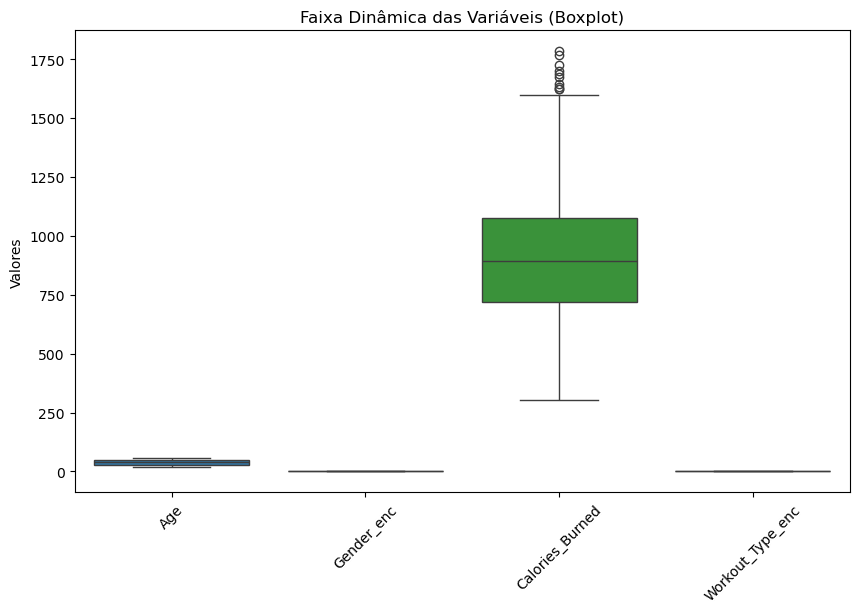

In [11]:

plt.figure(figsize=(10, 6))
variaveis = ['Age', 'Gender_enc', 'Calories_Burned', 'Workout_Type_enc']
sns.boxplot(data=df[variaveis])
plt.title("Faixa Dinâmica das Variáveis (Boxplot)")
plt.xticks(rotation=45)
plt.ylabel("Valores")
plt.show()

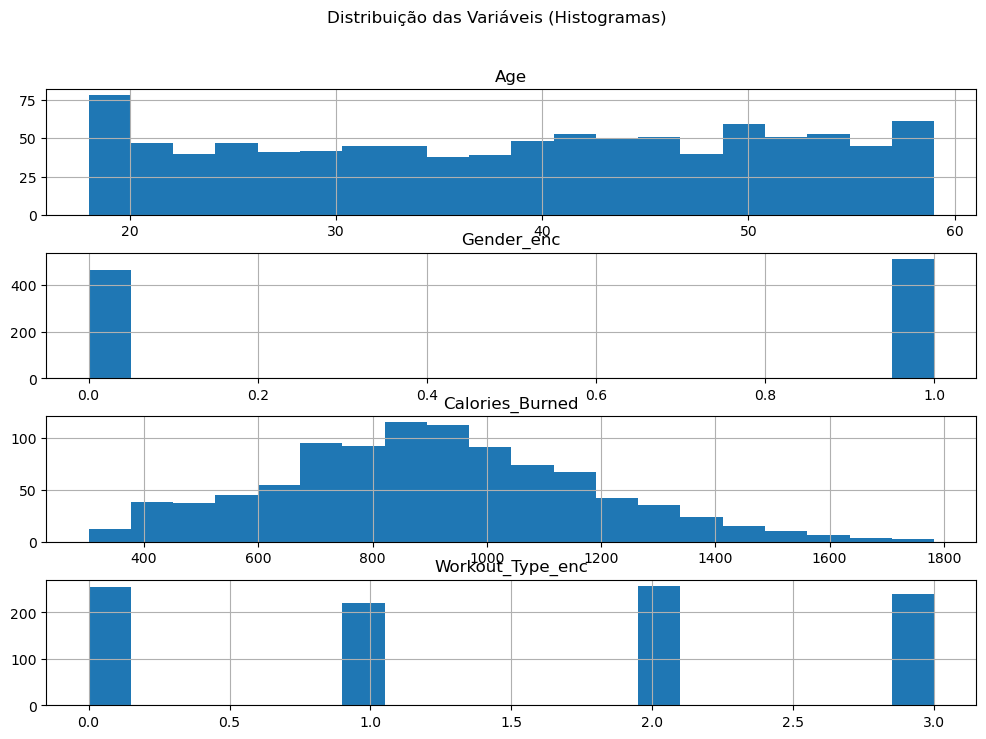

In [12]:
df[variaveis].hist(bins=20, figsize=(12, 8), layout=(len(df[variaveis].columns), 1))
plt.suptitle("Distribuição das Variáveis (Histogramas)")
plt.show()

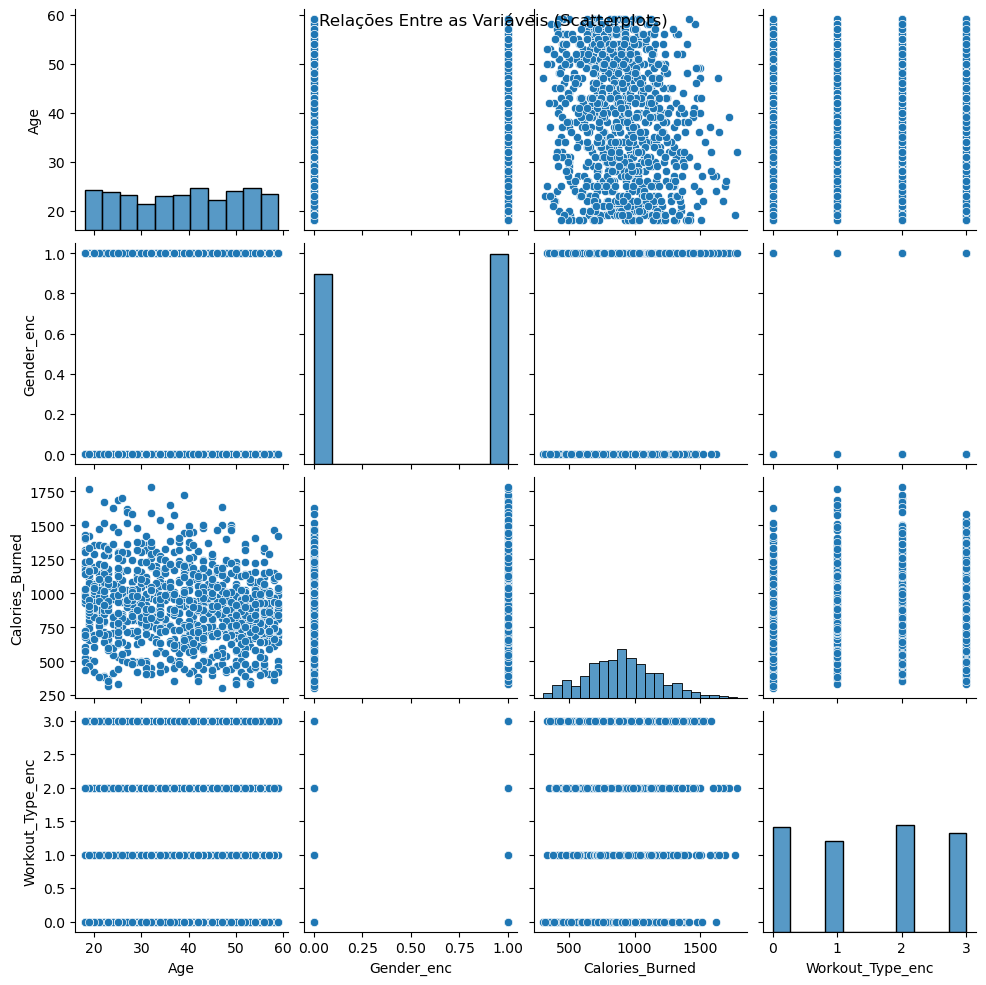

In [14]:
sns.pairplot(df[variaveis])
plt.suptitle("Relações Entre as Variáveis (Scatterplots)")
plt.show()

In [16]:
# Selecionar colunas para o agrupamento
X = df[variaveis]

In [18]:
# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
# K-Médias: Determinar o número ótimo de clusters
silhouette_scores_kmeans = []
range_n_clusters = range(2, 6)  # Testar de 2 a 5 clusters

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores_kmeans.append(silhouette_avg)

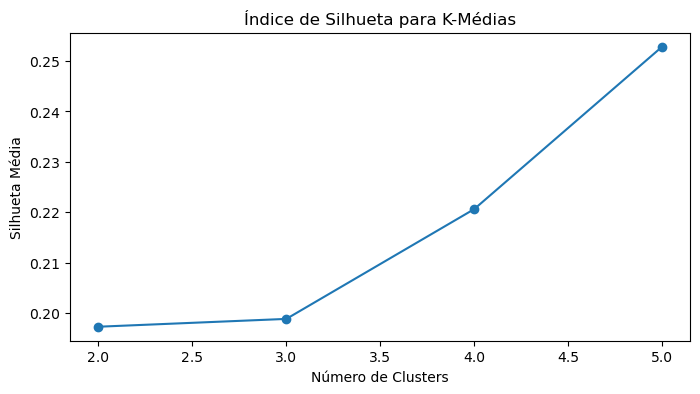

In [24]:
# Plotar os índices de silhueta para K-Médias
plt.figure(figsize=(8, 4))
plt.plot(range_n_clusters, silhouette_scores_kmeans, marker='o')
plt.title("Índice de Silhueta para K-Médias")
plt.xlabel("Número de Clusters")
plt.ylabel("Silhueta Média")
plt.show()

In [27]:

# Melhor número de clusters
best_kmeans_k = range_n_clusters[np.argmax(silhouette_scores_kmeans)]
print(f"Melhor número de clusters (K-Médias): {best_kmeans_k}")

Melhor número de clusters (K-Médias): 5


In [31]:
# DBSCAN: Testar diferentes combinações de eps e min_samples
eps_values = np.arange(0.1, 2.0, 0.1)  # Valores de eps
min_samples_values = range(2, 10)  # Valores de min_samples

best_silhouette_dbscan = -1
best_params_dbscan = {}

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(X_scaled)
        
        # Verificar se há mais de 1 cluster
        if len(np.unique(cluster_labels)) > 1:
            silhouette_avg = silhouette_score(X_scaled, cluster_labels)
            if silhouette_avg > best_silhouette_dbscan:
                best_silhouette_dbscan = silhouette_avg
                best_params_dbscan = {'eps': eps, 'min_samples': min_samples}

In [32]:
print(f"Melhores parâmetros (DBSCAN): {best_params_dbscan}")
print(f"Melhor índice de silhueta (DBSCAN): {best_silhouette_dbscan}")

Melhores parâmetros (DBSCAN): {'eps': 1.1, 'min_samples': 2}
Melhor índice de silhueta (DBSCAN): 0.2705050324747306


In [33]:
# Comparação final
if silhouette_scores_kmeans[np.argmax(silhouette_scores_kmeans)] > best_silhouette_dbscan:
    print(f"K-Médias foi o melhor método com índice de silhueta: {max(silhouette_scores_kmeans)}")
else:
    print(f"DBSCAN foi o melhor método com índice de silhueta: {best_silhouette_dbscan}")

DBSCAN foi o melhor método com índice de silhueta: 0.2705050324747306


In [39]:
# K-Means:  Calinski-Harabasz e Davies-Bouldin
ch_scores_kmeans = []
dbi_scores_kmeans = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    
    # Índice de Calinski-Harabasz
    ch_score = calinski_harabasz_score(X_scaled, cluster_labels)
    ch_scores_kmeans.append(ch_score)
    
    # Índice de Davies-Bouldin
    dbi_score = davies_bouldin_score(X_scaled, cluster_labels)
    dbi_scores_kmeans.append(dbi_score)

In [37]:
# Melhor número de clusters com base nos índices
best_ch_kmeans_k = range_n_clusters[np.argmax(ch_scores_kmeans)]
best_dbi_kmeans_k = range_n_clusters[np.argmin(dbi_scores_kmeans)]

print(f"Melhor número de clusters (K-Médias, Calinski-Harabasz): {best_ch_kmeans_k}")
print(f"Melhor número de clusters (K-Médias, Davies-Bouldin): {best_dbi_kmeans_k}")

Melhor número de clusters (K-Médias, Calinski-Harabasz): 5
Melhor número de clusters (K-Médias, Davies-Bouldin): 5


In [40]:
# DBSCAN: Calcular Calinski-Harabasz e Davies-Bouldin
ch_scores_dbscan = []
dbi_scores_dbscan = []

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(X_scaled)
        
        # Verificar se há mais de 1 cluster
        if len(np.unique(cluster_labels)) > 1:
            # Índice de Calinski-Harabasz
            ch_score = calinski_harabasz_score(X_scaled, cluster_labels)
            ch_scores_dbscan.append((eps, min_samples, ch_score))
            
            # Índice de Davies-Bouldin
            dbi_score = davies_bouldin_score(X_scaled, cluster_labels)
            dbi_scores_dbscan.append((eps, min_samples, dbi_score))


In [41]:
# Melhores parâmetros para DBSCAN
best_ch_dbscan = max(ch_scores_dbscan, key=lambda x: x[2])  # Maior CH
best_dbi_dbscan = min(dbi_scores_dbscan, key=lambda x: x[2])  # Menor DBI

print(f"Melhores parâmetros (DBSCAN, Calinski-Harabasz): {best_ch_dbscan}")
print(f"Melhores parâmetros (DBSCAN, Davies-Bouldin): {best_dbi_dbscan}")

Melhores parâmetros (DBSCAN, Calinski-Harabasz): (1.1, 2, 334.4107273862225)
Melhores parâmetros (DBSCAN, Davies-Bouldin): (0.1, 2, 1.1699306599053942)


Análise dos Resultados


1. K-Médias
O índice de silhueta, o coeficiente de Calinski-Harabasz e o índice de Davies-Bouldin são adequados.
Todos assumem clusters convexos e bem separados, que são características intrínsecas do K-Means.
Provavelmente, os três índices vão convergir para o mesmo número ótimo de clusters.
2. DBSCAN
O índice de silhueta pode ser problemático devido ao tratamento de outliers e à forma arbitrária dos clusters.
Calinski-Harabasz funciona bem, mas pode ser influenciado por ruído.
Davies-Bouldin é mais robusto para clusters de formas arbitrárias e menos sensível ao ruído.


Conclusão

A silhueta NÃO é a melhor métrica para escolher o número de clusters no DBSCAN, pois não lida bem com outliers e clusters de formas não convexas.
Para o DBSCAN, o Davies-Bouldin Index ou o Calinski-Harabasz Index são mais indicados, pois consideram a densidade e separação relativa dos clusters, além de lidarem melhor com formas complexas.

Passos para Agrupamento de Séries Temporais com Base na Correlação Cruzada

Preparação dos Dados:

Certifique-se de que todas as séries temporais possuem o mesmo comprimento ou interpolação adequada, caso necessário.
Normalize ou padronize as séries para eliminar viés de escala.
Cálculo da Correlação Cruzada:

Calcule a correlação cruzada entre todas as combinações possíveis de pares de séries temporais.
Identifique o valor máximo de correlação cruzada para cada par.
Construção da Matriz de Similaridade:

Organize os valores máximos de correlação cruzada em uma matriz 
𝑛×𝑛, onde n é o número de séries (neste caso, 10).
Cada elemento da matriz representa o grau de similaridade entre duas séries.
Escolha de um Algoritmo de Clusterização:

Utilize a matriz de similaridade como entrada para um algoritmo de clusterização.
Determinação do Número de Grupos:

Defina o número de clusters como 3, conforme o problema especificado.
Execução do Algoritmo de Clusterização:

Aplique o algoritmo selecionado para agrupar as séries temporais em 3 grupos.
Validação dos Clusters:

Avalie a qualidade dos clusters utilizando métricas como a Silhouette Score ou a consistência dos grupos em relação aos valores de correlação cruzada.

Algoritmo de Clusterização Recomendado

Algoritmo: Clustering Hierárquico Aglomerativo (Hierarchical Agglomerative Clustering, HAC)
Justificativa:

O HAC é ideal para utilizar matrizes de similaridade, pois não requer vetores de características explícitos.
Permite uma visualização do agrupamento em forma de dendrograma, útil para verificar a coesão dos grupos.
É facilmente configurável para agrupar em um número fixo de clusters, como os 3 exigidos.
